In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Legal Summary Data Clean

In [13]:
january_summary = pd.read_excel('Monthly Summary Report (2025-01).xlsx', dtype=str, keep_default_na=False)
january_summary['Month'] = '2025-01'
february_summary = pd.read_excel('Monthly Summary Report (2025-02).xlsx', dtype=str, keep_default_na=False)
february_summary['Month'] = '2025-02'
march_summary = pd.read_excel('Monthly Summary Report (2025-03).xlsx', dtype=str, keep_default_na=False)
march_summary['Month'] = '2025-03'
## No April Data Yet?
may_summary = pd.read_excel('Monthly Summary Report (2024-05).xlsx', dtype=str, keep_default_na=False)
may_summary['Month'] = '2024-05'
june_summary = pd.read_excel('Monthly Summary Report (2024-06).xlsx', dtype=str, keep_default_na=False)
june_summary['Month'] = '2024-06'
july_summary = pd.read_excel('Monthly Summary Report (2024-07).xlsx', dtype=str, keep_default_na=False)
july_summary['Month'] = '2024-07'
august_summary = pd.read_excel('Monthly Summary Report (2024-08).xlsx', dtype=str, keep_default_na=False)
august_summary['Month'] = '2024-08'
september_summary = pd.read_excel('Monthly Summary Report (2024-09).xlsx', dtype=str, keep_default_na=False)
september_summary['Month'] = '2024-09'
october_summary = pd.read_excel('Monthly Summary Report (2024-10).xlsx',dtype=str, keep_default_na=False)
october_summary['Month'] = '2024-10'
november_summary = pd.read_excel('Monthly Summary Report (2024-11).xlsx', dtype=str, keep_default_na=False)
november_summary['Month'] = '2024-11'
december_summary = pd.read_excel('Monthly Summary Report (2024-12).xlsx', dtype=str, keep_default_na=False)
december_summary['Month'] = '2024-12'

/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-pack

In [14]:
def header_cleaning(df):
    df.rename(columns={'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Legal_Menu_Option',
                       'Time Zone: (UTC-06:00) Central Standard Time (America/Chicago)': 'Legal_Menu_Option',
                       'Unnamed: 1': 'Menu_Selection',
                       'Unnamed: 2': 'Queue_Selection',
                       'Unnamed: 3': 'Group_Suboption',
                       'Unnamed: 4': 'First_Queue_Name',
                       'Unnamed: 5': 'Final_Queue_Name',
                       'Unnamed: 6': 'Total_Calls',
                       'Unnamed: 7': 'Live_Queued_Calls',
                       'Unnamed: 8': 'Callback_Queued_Calls',
                       'Unnamed: 9': 'Closed_Queue_Calls',
                       'Unnamed: 10': 'Abandoned_Calls'
                       }, inplace= True)
    df = df.iloc[2:]
    df.replace('', pd.NA, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.reset_index(inplace = True, drop = True)
    return df

In [15]:
january_summary = header_cleaning(january_summary)
february_summary = header_cleaning(february_summary)
march_summary = header_cleaning(march_summary)
may_summary = header_cleaning(may_summary)
june_summary = header_cleaning(june_summary)
july_summary = header_cleaning(july_summary)
august_summary = header_cleaning(august_summary)
september_summary = header_cleaning(september_summary)
october_summary = header_cleaning(october_summary)
november_summary = header_cleaning(november_summary)
december_summary = header_cleaning(december_summary)

all_datasets = [january_summary, february_summary, march_summary, may_summary, june_summary, july_summary, august_summary, september_summary, october_summary, november_summary, december_summary]

/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_20357/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', pd.NA, inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_20357/1202797010.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_20357/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [16]:
combined = pd.DataFrame(columns=january_summary.columns)
for dataset in all_datasets:
    combined = pd.concat([combined, dataset[:len(dataset) - 1]], axis = 0)

In [17]:
combined["Total_Calls"] = pd.to_numeric(combined["Total_Calls"], errors="coerce")
combined["Live_Queued_Calls"] = pd.to_numeric(combined["Live_Queued_Calls"], errors="coerce")
combined["Callback_Queued_Calls"] = pd.to_numeric(combined["Callback_Queued_Calls"], errors="coerce")
combined["Closed_Queue_Calls"] = pd.to_numeric(combined["Closed_Queue_Calls"], errors="coerce")
combined["Abandoned_Calls"] = pd.to_numeric(combined["Abandoned_Calls"], errors="coerce")


## Question/Goal 1

In [18]:
grouped_calls = combined.groupby("Legal_Menu_Option")["Total_Calls"].sum().reset_index()

grouped_calls = grouped_calls.sort_values(by="Total_Calls", ascending=False)

grouped_calls

,Legal_Menu_Option,Total_Calls
5,Family,13229
9,Legal,10122
7,Housing,9771
11,Pre-Legal Seniors,7657
10,Other Legal,7115
1,Benefits,4665
2,Consumer,3740
4,Employment,2517
8,Immigration,2217
3,Criminal Records,1260


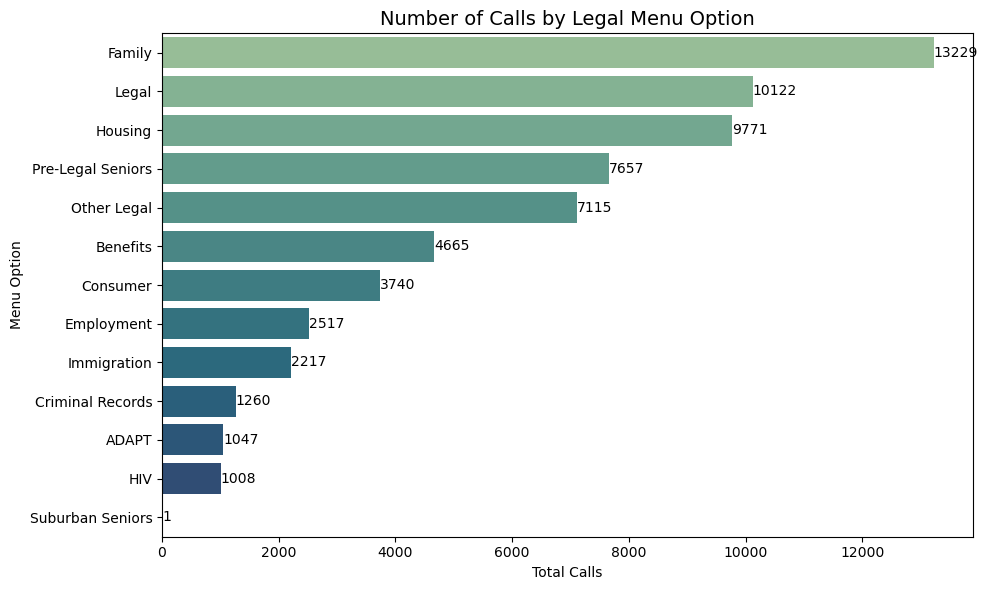

In [19]:
sorted_df = grouped_calls.sort_values("Total_Calls", ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sorted_df, y="Legal_Menu_Option", x="Total_Calls", palette="crest")

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 str(int(width)), va='center')

plt.title("Number of Calls by Legal Menu Option", fontsize=14)
plt.xlabel("Total Calls")
plt.ylabel("Menu Option")
plt.tight_layout()
plt.show()


In [20]:
call_columns = ["Live_Queued_Calls", "Callback_Queued_Calls", "Closed_Queue_Calls", "Abandoned_Calls", "Total_Calls"]
grouped = combined.groupby("Legal_Menu_Option")[call_columns].sum().reset_index()

grouped["% Live"] = grouped["Live_Queued_Calls"] / grouped["Total_Calls"]
grouped["% Callback"] = grouped["Callback_Queued_Calls"] / grouped["Total_Calls"]
grouped["% Closed"] = grouped["Closed_Queue_Calls"] / grouped["Total_Calls"]
grouped["% Abandoned"] = grouped["Abandoned_Calls"] / grouped["Total_Calls"]

outcomes_pct = grouped[["Legal_Menu_Option", "% Live", "% Callback", "% Closed", "% Abandoned"]]

In [21]:
menu_usage = combined.groupby(['Legal_Menu_Option','Menu_Selection', 'Queue_Selection', 'Final_Queue_Name']).agg(
    Total_Calls=('Total_Calls', 'sum'),
    Live_Queued_Calls=('Live_Queued_Calls', 'sum'),
    Closed_Queue_Calls=('Closed_Queue_Calls', 'sum'),
    Abandoned_Calls=('Abandoned_Calls', 'sum')
).reset_index()

menu_usage = menu_usage.sort_values('Total_Calls', ascending=False)

menu_usage

,Legal_Menu_Option,Menu_Selection,Queue_Selection,Final_Queue_Name,Total_Calls,Live_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls
206,Legal,N/A,N/A,N/A,7405,0,0,0
97,Family,N/A,Family,N/A,7330,0,7284,0
214,Other Legal,All Other Issues,N/A,N/A,3733,0,0,0
31,Benefits,N/A,Benefits,N/A,3247,0,3234,0
145,Housing,N/A,Housing,N/A,2831,0,2828,0
...,...,...,...,...,...,...,...,...
104,Family,Simple Divorce,Education,N/A,1,0,1,0
110,Family,Workers Comp,N/A,N/A,1,0,0,0
204,Legal,N/A,N/A,Employment,1,0,0,0
202,Legal,N/A,N/A,Consumer SP,1,0,0,0


In [22]:
abandonment_rates = combined.groupby('Menu_Selection').agg(
    Total_Calls=('Total_Calls', 'sum'),
    Abandoned_Calls=('Abandoned_Calls', 'sum')
).reset_index()
abandonment_rates['Abandonment_Rate'] = abandonment_rates['Abandoned_Calls'] / abandonment_rates['Total_Calls']

abandonment_rates = abandonment_rates.sort_values('Abandonment_Rate', ascending=False)

abandonment_rates

,Menu_Selection,Total_Calls,Abandoned_Calls,Abandonment_Rate
4,From Simple Divorce to Clinics,271,20,0.073801
7,N/A,50642,1547,0.030548
3,From Housing to Clinics,447,13,0.029083
8,Other Legal Issues - Clinic,1403,37,0.026372
10,Simple Divorce,1233,18,0.014599
6,Immigration Other,590,8,0.013559
5,Housing Other,2023,6,0.002966
1,Child Support,1211,3,0.002477
0,All Other Issues,4541,6,0.001321
9,Personal Injury,944,1,0.001059


In [23]:
combined['Call_Path'] = (
    combined['Legal_Menu_Option'].astype(str) + ' > ' +
    combined['Menu_Selection'].astype(str) + ' > ' +
    combined['Queue_Selection'].astype(str) + ' > ' +
    combined['First_Queue_Name'].astype(str) + ' > ' +
    combined['Final_Queue_Name'].astype(str)
)


rare_paths = combined[combined['Total_Calls'] == 1]


pd.set_option('display.max_colwidth', None)

df = rare_paths[['Call_Path', "Live_Queued_Calls", "Callback_Queued_Calls", "Closed_Queue_Calls", "Abandoned_Calls", "Total_Calls"]]

In [24]:
df['Closed_Queue_Calls'].sum()

258

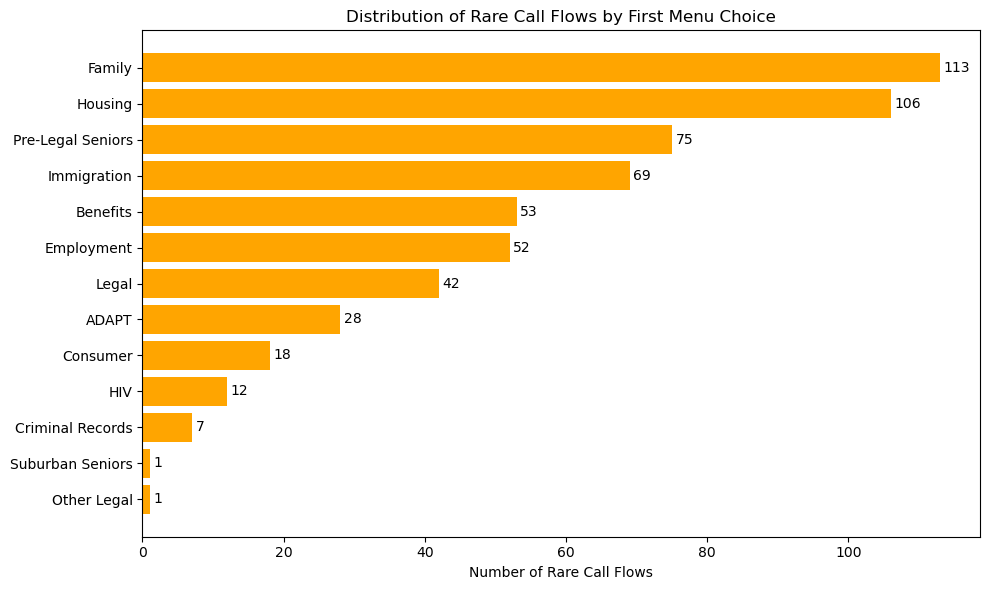

,First Menu Choice,Number of Rare Call Flows
0,Family,113
1,Housing,106
2,Pre-Legal Seniors,75
3,Immigration,69
4,Benefits,53
5,Employment,52
6,Legal,42
7,ADAPT,28
8,Consumer,18
9,HIV,12


In [25]:
first_step_counts = rare_paths['Legal_Menu_Option'].value_counts().reset_index()
first_step_counts.columns = ['First Menu Choice', 'Number of Rare Call Flows']

plt.figure(figsize=(10,6))
bars = plt.barh(first_step_counts['First Menu Choice'], first_step_counts['Number of Rare Call Flows'], color='orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.title('Distribution of Rare Call Flows by First Menu Choice')
plt.xlabel('Number of Rare Call Flows')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

first_step_counts


In [26]:
combined['Call_Path'] = (combined['Legal_Menu_Option'].astype(str) + ' > ' +
                   combined['Menu_Selection'].astype(str) + ' > ' +
                   combined['Queue_Selection'].astype(str) + ' > ' +
                   combined['First_Queue_Name'].astype(str) + ' > ' +
                   combined['Final_Queue_Name'].astype(str))

path_summary = combined.groupby('Call_Path')['Total_Calls'].sum().reset_index()

path_summary = path_summary.sort_values(by='Total_Calls', ascending=True)

path_summary

,Call_Path,Total_Calls
277,Suburban Seniors > N/A > N/A > SubSenior Tenant > SubSenior Tenant,1
181,Legal > All Other Issues > N/A > Staff Directory Spanish Transfer > Staff Directory Spanish Transfer,1
183,Legal > Criminal > Consumer > Clinic Voicemail Transfer > Clinic Voicemail Transfer,1
70,Employment > Personal Injury > N/A > N/A > N/A,1
69,Employment > Personal Injury > Employment > N/A > N/A,1
...,...,...
145,Housing > N/A > Housing > N/A > N/A,2831
31,Benefits > N/A > Benefits > N/A > N/A,3247
214,Other Legal > All Other Issues > N/A > N/A > N/A,3733
97,Family > N/A > Family > N/A > N/A,7330


In [27]:
combined['Abandoned_Rate'] = combined['Abandoned_Calls'] / combined['Total_Calls']
df_abandoned = combined[combined['Abandoned_Rate'] > 0.33] 

df_abandoned.sort_values('Abandoned_Rate', ascending=False)[['Call_Path', 'Total_Calls', 'Abandoned_Calls', 'Abandoned_Rate']]


,Call_Path,Total_Calls,Abandoned_Calls,Abandoned_Rate
135,Immigration > Immigration Other > Immigration > Clinic Voicemail Transfer > Clinic Voicemail Transfer,1,1,1.000000
99,Housing > All Other Issues > Housing > Clinic Voicemail Transfer > Clinic Voicemail Transfer,1,1,1.000000
186,Pre-Legal Seniors > N/A > SubSenior Consumer > Consumer SubSeniors > Consumer SubSeniors,1,1,1.000000
205,Pre-Legal Seniors > N/A > SubSenior Other > Other SubSeniors SP > Other SubSeniors SP,1,1,1.000000
8,Benefits > Personal Injury > Benefits > Benefits > Benefits,1,1,1.000000
...,...,...,...,...
82,Family > N/A > Family > Family > Family,3,1,0.333333
65,Legal > N/A > Consumer > Consumer SP > Consumer SP,3,1,0.333333
10,Benefits > N/A > Benefits > Benefits SP > Benefits SP,6,2,0.333333
179,Pre-Legal Seniors > N/A > SubSenior Benefits > SubSenior Benefits SP > SubSenior Benefits SP,3,1,0.333333


In [28]:

df_abandoned_filtered = df_abandoned[df_abandoned['Total_Calls'] >= 20]

df_abandoned_filtered = df_abandoned_filtered.sort_values(by='Abandoned_Rate', ascending=False)

df_abandoned_filtered[['Call_Path', 'Total_Calls', 'Abandoned_Calls', 'Abandoned_Rate']]


,Call_Path,Total_Calls,Abandoned_Calls,Abandoned_Rate
194,Pre-Legal Seniors > N/A > SubSenior Homeowner > SubSenior Homeowner > SubSenior Homeowner,25,11,0.440000
182,Pre-Legal Seniors > N/A > SubSenior Homeowner > SubSenior Homeowner > SubSenior Homeowner,24,10,0.416667
185,Pre-Legal Seniors > N/A > SubSenior Benefits > SubSenior Benefits > SubSenior Benefits,34,14,0.411765
224,Pre-Legal Seniors > N/A > SubSenior Benefits > SubSenior Benefits > SubSenior Benefits,26,10,0.384615
206,Pre-Legal Seniors > N/A > SubSenior Other > SubSenior Other > SubSenior Other,50,19,0.380000
204,Pre-Legal Seniors > N/A > SubSenior Family > SubSenior Family > SubSenior Family,36,13,0.361111
19,Benefits > N/A > Benefits > Benefits > Benefits,25,9,0.360000
190,Pre-Legal Seniors > N/A > SubSenior Benefits > SubSenior Benefits > SubSenior Benefits,51,18,0.352941
166,Pre-Legal Seniors > N/A > SubSenior Benefits > SubSenior Benefits > SubSenior Benefits,57,20,0.350877
67,Family > N/A > Family > Family > Family,20,7,0.350000


## Question/Goal 2

In [29]:
special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']

special_df = combined[combined['Final_Queue_Name'].str.contains('|'.join(special_lines), case=False, na=False)]

direct_calls = special_df[special_df['Menu_Selection'].isna() | (special_df['Menu_Selection'] == 'N/A')]['Total_Calls'].sum()
transferred_calls = special_df[~special_df['Menu_Selection'].isna() & (special_df['Menu_Selection'] != 'N/A')]['Total_Calls'].sum()

total_special_calls = direct_calls + transferred_calls
direct_percent = direct_calls / total_special_calls
transferred_percent = transferred_calls / total_special_calls

print(f"Direct calls: {direct_calls} ({direct_percent:.2%})")
print(f"Transferred calls: {transferred_calls} ({transferred_percent:.2%})")

Direct calls: 6637 (73.43%)
Transferred calls: 2402 (26.57%)


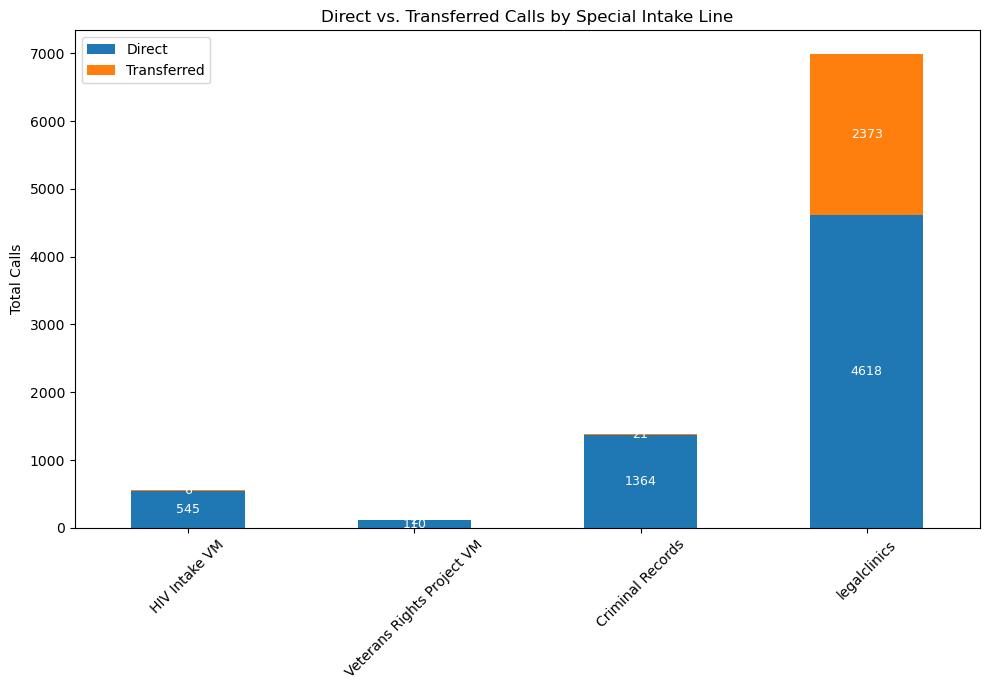

In [30]:

special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']
display_labels = ['HIV Intake VM', 'Veterans Rights Project VM', 'Criminal Records', 'legalclinics']
results = []

for line in special_lines:
    line_df = combined[combined['Final_Queue_Name'].str.contains(line, case=False, na=False)]
    direct = line_df[line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    transferred = line_df[~line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    results.append({'Line': line, 'Direct': direct, 'Transferred': transferred})

results_df = pd.DataFrame(results)
results_df.index = display_labels  
results_df = results_df[['Direct', 'Transferred']]

ax = results_df.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Direct vs. Transferred Calls by Special Intake Line')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.tight_layout()

for i, (index, row) in enumerate(results_df.iterrows()):
    y_offset = 0
    for col in results_df.columns:
        height = row[col]
        if height > 0:
            ax.text(i, y_offset + height / 2, str(int(height)), ha='center', va='center', fontsize=9, color='white')
            y_offset += height

plt.show()


In [31]:
results_df

,Direct,Transferred
HIV Intake VM,545,6
Veterans Rights Project VM,110,2
Criminal Records,1364,21
legalclinics,4618,2373


In [32]:
clinic_df = combined[combined['Final_Queue_Name'].str.contains('Clinic', case=False, na=False)]
direct_calls = clinic_df[clinic_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
transferred_calls = clinic_df[~clinic_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()

print(f"Direct: {direct_calls}, Transferred: {transferred_calls}")


Direct: 4618, Transferred: 2373


In [33]:
spanish_df = combined[combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]
direct_sp = spanish_df[spanish_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
transferred_sp = spanish_df[~spanish_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()

print(f"Direct: {direct_sp}, Transferred: {transferred_sp}")


Direct: 587, Transferred: 28


In [34]:
spanish_queue_volume = spanish_df.groupby('Final_Queue_Name')['Total_Calls'].sum().sort_values(ascending=False)
print(spanish_queue_volume)


Final_Queue_Name
Family SP                           132
Immigration SP                       85
Consumer SP                          63
Benefits SP                          62
SubSenior Other SP                   44
SubSenior Benefits SP                36
Employment SP                        35
Staff Directory Spanish Transfer     27
SubSenior Consumer SP                27
SubSenior Homeowner SP               17
SubSenior Family SP                  17
Housing SP                           14
Education SP                         12
SubSenior Employment SP              12
ADAPT SP                             11
SubSenior Tenant SP                   7
SubSenior ADAPT SP                    4
Benefits SubSeniors SP                4
Other SubSeniors SP                   3
Consumer SubSeniors SP                2
ADAPT SubSeniors SP                   1
Name: Total_Calls, dtype: int64


In [35]:
spanish_outcomes = spanish_df[['Live_Queued_Calls', 'Callback_Queued_Calls', 
                               'Closed_Queue_Calls', 'Abandoned_Calls']].sum()

spanish_outcomes_pct = (spanish_outcomes / spanish_df['Total_Calls'].sum()) * 100
spanish_outcomes_pct.round(2)


Live_Queued_Calls        19.51
Callback_Queued_Calls    75.93
Closed_Queue_Calls        0.00
Abandoned_Calls          20.65
dtype: float64

In [36]:
sp_calls = combined[combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]

regular_calls = combined[~combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]

sp_total = sp_calls['Total_Calls'].astype(float).sum()
regular_total = regular_calls['Total_Calls'].astype(float).sum()
combined_total = sp_total + regular_total

sp_pct = (sp_total / combined_total) * 100
regular_pct = (regular_total / combined_total) * 100

print(f"Spanish (SP) Calls: {sp_total:.0f} ({sp_pct:.2f}%)")
print(f"Regular Calls: {regular_total:.0f} ({regular_pct:.2f}%)")


Spanish (SP) Calls: 615 (0.96%)
Regular Calls: 63734 (99.04%)


## Question/Goal 3

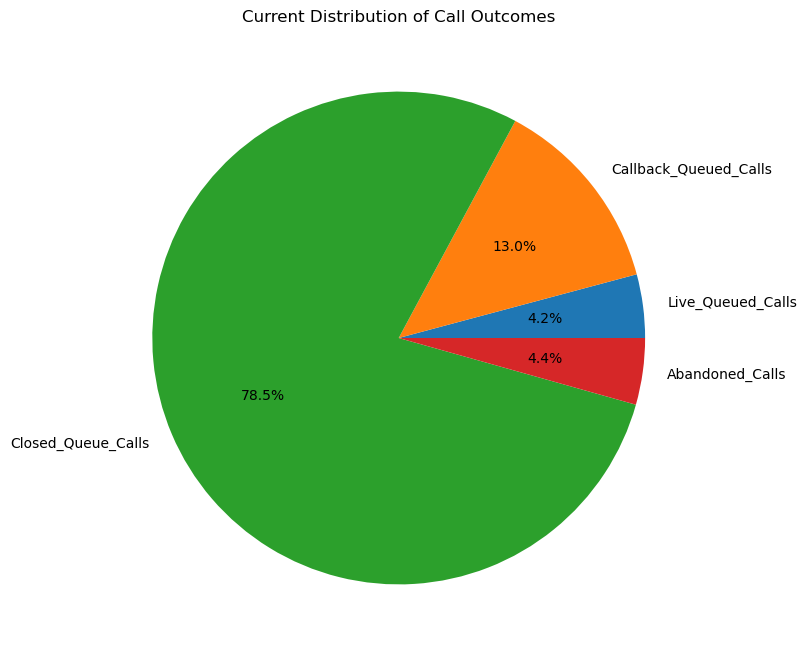

In [37]:
outcome_cols = ['Live_Queued_Calls', 'Callback_Queued_Calls', 'Closed_Queue_Calls', 'Abandoned_Calls']
outcomes_sum = combined[outcome_cols].sum()

outcomes_sum.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Current Distribution of Call Outcomes')
plt.ylabel('')
plt.show()

In [38]:
senior_df = combined[combined['Final_Queue_Name'].str.contains('Senior', case=False, na=False)]
regular_df = combined[~combined['Final_Queue_Name'].str.contains('Senior', case=False, na=False)]

senior_live_rate = senior_df['Live_Queued_Calls'].sum() / senior_df['Total_Calls'].sum()
regular_live_rate = regular_df['Live_Queued_Calls'].sum() / regular_df['Total_Calls'].sum()

print(f"Senior live service rate: {senior_live_rate:.2%}")
print(f"Regular live service rate: {regular_live_rate:.2%}")

Senior live service rate: 33.61%
Regular live service rate: 0.98%


In [39]:
combined["Final_Queue_Name"] = combined["Final_Queue_Name"].astype(str).str.strip()

is_subsenior = combined["Final_Queue_Name"].str.contains("SubSenior", case=False, na=False)

subsenior_calls = combined.loc[is_subsenior, "Total_Calls"].sum()

total_calls = combined["Total_Calls"].sum()

percent_subsenior = subsenior_calls / total_calls

print(f"Total calls to SubSenior queues: {subsenior_calls:,}")
print(f"Total calls overall: {total_calls:,}")
print(f"Percentage of total calls to SubSenior queues: {percent_subsenior:.2%}")


Total calls to SubSenior queues: 2,916
Total calls overall: 64,349
Percentage of total calls to SubSenior queues: 4.53%


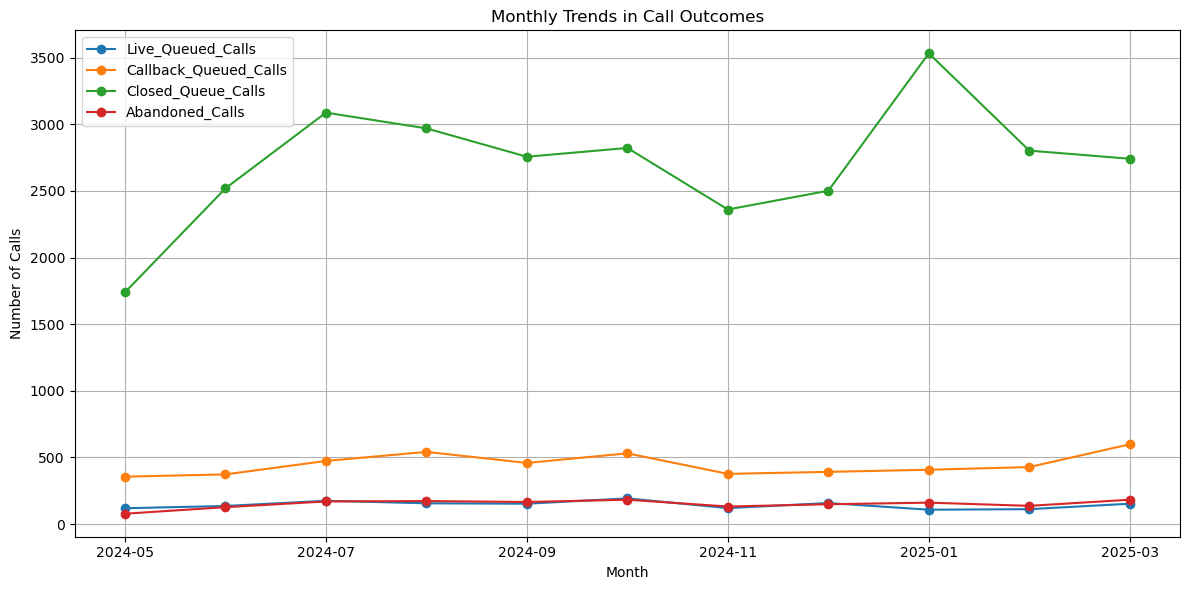

In [40]:
monthly = combined.groupby('Month')[['Live_Queued_Calls', 'Callback_Queued_Calls', 
                               'Closed_Queue_Calls', 'Abandoned_Calls']].sum()

monthly.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Trends in Call Outcomes')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()


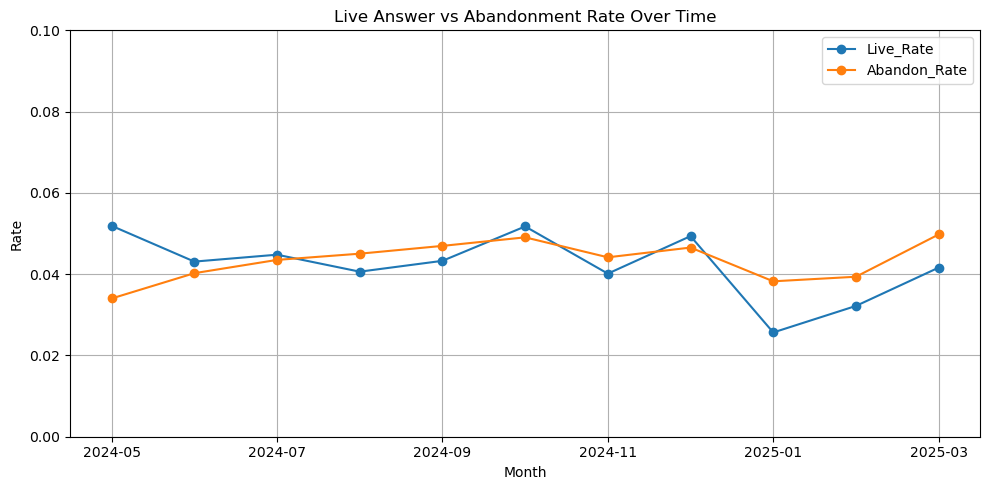

In [41]:
monthly['Live_Rate'] = monthly['Live_Queued_Calls'] / monthly.sum(axis=1)
monthly['Abandon_Rate'] = monthly['Abandoned_Calls'] / monthly.sum(axis=1)

monthly[['Live_Rate', 'Abandon_Rate']].plot(
    figsize=(10, 5),
    title="Live Answer vs Abandonment Rate Over Time",
    marker='o'
)

plt.ylabel('Rate')
plt.ylim(0, 0.1) 
plt.grid(True)
plt.tight_layout()
plt.show()


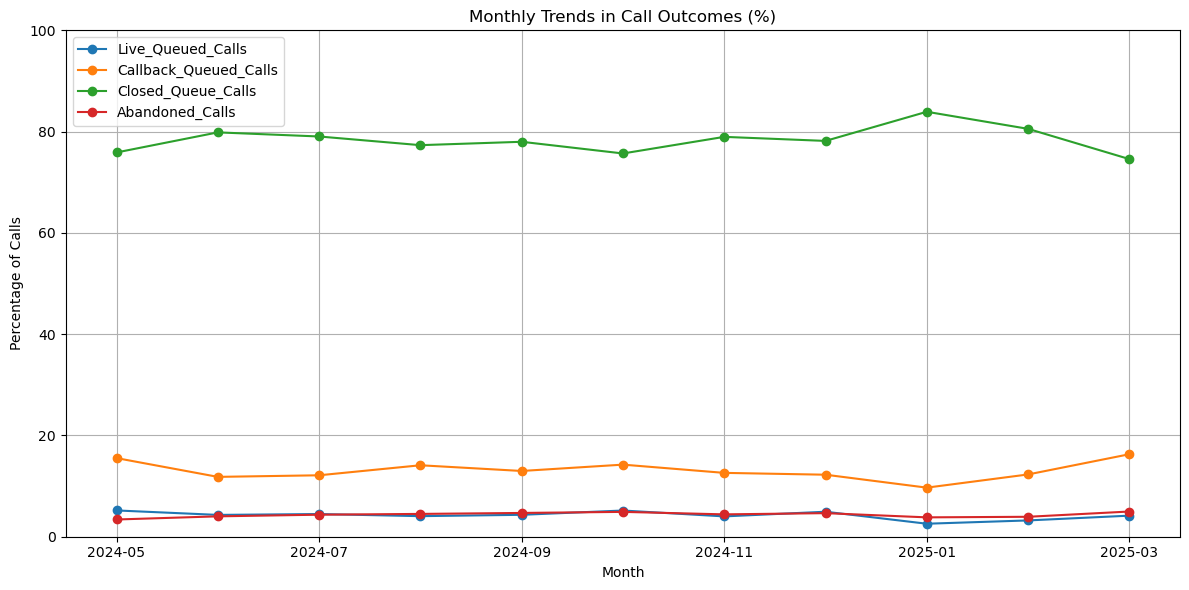

In [42]:
monthly = combined.groupby('Month')[['Live_Queued_Calls', 'Callback_Queued_Calls', 
                               'Closed_Queue_Calls', 'Abandoned_Calls']].sum()

monthly_pct = monthly.div(monthly.sum(axis=1), axis=0) * 100

monthly_pct.plot(figsize=(12, 6), marker='o')

plt.title('Monthly Trends in Call Outcomes (%)')
plt.ylabel('Percentage of Calls')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()
